# <center><font color='blue'>Parcours Data Scientist, 2021-2022</font></center>
## <center>OpenClassrooms</center>

##  **Projet n°7**   : *Partie Preprocessing*
##   <center><font color='blue'>Implémentez un modèle de scoring</font></center>

### **Présenté par : GUEYE Oumar**    **, Juin-Juillet 2022**

## Objectif : 

L'objectif est de développer **un modèle, un outil de scoring** qui permet de calculer la probabilité qu’un client rembourse son crédit mais d'appuyer la décision d'accorder ou de refuser un prêt à un client potentiel.

-----------
#### Cette partie de preprocessing est décomposée en 2 sous-parties.


- La première partie est une brève inspection et description des données...

Pour chaque variable numérique des jeux de données, il y a des informations concernant le pourcentage de données manquantes, la moyenne, la médianne, l'écart-type etc... 

Et pour chaque variable catégorielle, il y a des informations concernant les données manquantes et pour chaque valeur prise par la variable il y a le nombre d'occurences.

- La deuxième partie s'intéresse au nettoyage et à l'exploration de notre données.


Les individus dont les valeurs des variables catégorielles sont non communes aux jeux test et d'entrainement sont supprimés ainsi que les individus dont les valeurs trop peu fréquentes.
Les valeurs abérrantes de certaines variables numériques sont remplacés par 'NaN' pour une imputation ultérieure.



--------------
- Découverte de Git et GitHub
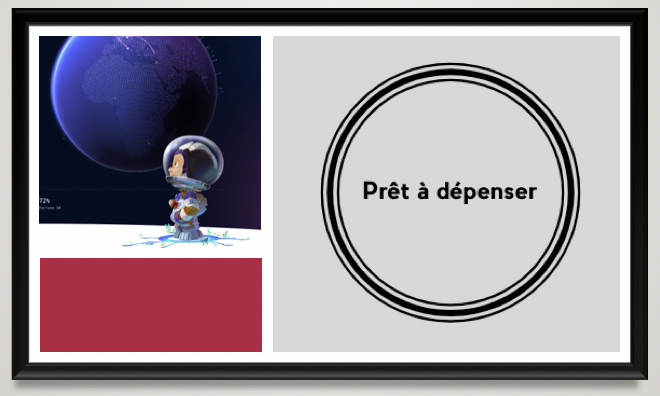

### Livrables :
- **Un notebook de preprocessing (Nettoyage/Exploration)** 
- Le **dashboard** interactif et l’API de prédiction du score, déployées chacunes sur le cloud.
- Un **dossier** sur un outil de versioning de code contenant :
    - Le code de la modélisation (du prétraitement à la prédiction)
    - Le code générant le dashboard
    - Le code permettant de déployer le modèle sous forme d'API
- Une **note méthodologique** décrivant :
    - La méthodologie d'entraînement du modèle (2 pages maximum)
    - La fonction coût métier, l'algorithme d'optimisation et la métrique d'évaluation (1 page maximum)
    - L’interprétabilité globale et locale du modèle (1 page maximum)
    - Les limites et les améliorations possibles (1 page maximum)
- Un support de **présentation** pour la soutenance, détaillant le travail réalisé.

**Méthodologie :**
 
 - Description des données (dimension, types de variables, etc...)
 - Nettoyage des données (valeurs manquantes, des doublons, des outliers• Analyse Univariée, Analyse Multivariée • Suppression des variables non significatives, • Feature Ingering).
 - Encondage des variables (catégorielles et les 'variables temporelles')

-----------------
# <font color='blue'>I. Preprocessing </font> 

### Chargement des librairies nécessaires

In [1]:
#data
import os
import pandas as pd
import numpy as np
import missingno as msno
from scipy import stats

#plot 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Transformations de variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Feature engineering
import featuretools as ft
from featuretools import selection

# Data Augmentation
#from imblearn.over_sampling import SMOTE

# Metrics de ML
from sklearn.metrics import auc, roc_curve, roc_auc_score, make_scorer
from sklearn.metrics import precision_recall_curve

# Packages de cross_validation
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.calibration import calibration_curve, CalibratedClassifierCV

# Packages hyperopt pour la séléction d'hyperparamètres
#from hyperopt import hp, tpe
#from hyperopt.fmin import fmin


# Modèles de ML
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import ElasticNet


#from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import ElasticNet
from xgboost import plot_importance

# Librairies graphiques
import plotly.offline as py
import plotly.graph_objs as go
import plotly.offline as offline
import plotly.graph_objects as go
from plotly.subplots import make_subplots


#from imblearn.over_sampling import RandomOverSampler, SMOTE
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.pipeline import make_pipeline

# Plot settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set()

# Packages de cross_validation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split

/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
conda install -c conda-forge lightgbm 

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


# <font color='green'>1. Description des données</font> 

## Chargement des datasets

Nous allons charger tous les datasets pour en visualiser les informations principales :

In [3]:
#reading datas
import time
start = time.time()

# la fonction set_option() permet d'afficher toutes les lignes ou colonnes
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', 100)

data_train = pd.read_csv('application_train.csv').sort_values("SK_ID_CURR")
data_test = pd.read_csv('application_test.csv').sort_values("SK_ID_CURR")
bureau = pd.read_csv("bureau.csv").sort_values(['SK_ID_CURR', 'SK_ID_BUREAU'])
bureau_balance = pd.read_csv("bureau_balance.csv").sort_values("SK_ID_BUREAU")
cash_balance = pd.read_csv("POS_CASH_balance.csv").sort_values([
    'SK_ID_CURR', 'SK_ID_PREV'])
card_balance = pd.read_csv('credit_card_balance.csv').sort_values([
    'SK_ID_CURR', 'SK_ID_PREV'])
prev_app = pd.read_csv('previous_application.csv').sort_values(
    ['SK_ID_CURR', 'SK_ID_PREV'])
payments = pd.read_csv('installments_payments.csv').sort_values(
    ['SK_ID_CURR', 'SK_ID_PREV'])
smaple_sub = pd.read_csv('sample_submission.csv').sort_values("SK_ID_CURR")
                                                                                     
end = time.time()
print("reading time: ",(end-start),"sec")

reading time:  91.10792589187622 sec


##  Description des datasets 

In [4]:
data = {'Train_set': data_train,
              'Test_set' : data_test,
              'Bureau': bureau, 
              'solde_du_bureau': bureau_balance,
              'Solde_POS_CASH' : cash_balance,
              'solde_carte_crédit': card_balance, 
              'demande_précédente': prev_app, 
              'paiements_échelonnés': payments,
              "soumission_échantillon": smaple_sub}
print("Description de nos {} DataFrames".format(len(data)))
print("_"*100)
for i, j in data.items():
    print('{} DataFrame contient:      {} lignes et {} colonnes suivantes :'.format(str(i),j.shape[0],j.shape[1]))
    print(list(j.columns))
    print("-"*100)
    print("")

Description de nos 9 DataFrames
____________________________________________________________________________________________________
Train_set DataFrame contient:      307511 lignes et 122 colonnes suivantes :
['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CIT

## Inspections des différents jeux de données

### Jeu de données d'entrainement

In [5]:
# Affiche les 5 premières lignes des données d'entrainement
data_train.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data_train.shape

(307511, 122)

In [7]:
data_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 288.6+ MB


In [9]:
#Les Valeurs manquantes
data_train.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

Notre jeu de données est composé de plusieurs fichiers '.csv' qui renseignent les données personnelles des clients d'une banque. Le fichier **'application_train.csv'** donne de multiples informations personnelles des clients qui ont effectué un emprunt ainsi que la mention **remboursé** ou **défaut de payement** sur cet emprunt.

### Jeu de données test

In [10]:
data_test.head(3)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.066,0.059,0.9732,NaN,NaN,NaN,0.1379,...,0.0666,0.059,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


In [11]:
data_test.shape

(48744, 121)

In [12]:
data_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,16432.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,28212.000000,48736.000000,40076.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,...,15964.000000,25192.000000,15397.000000,22660.000000,24857.000000,21103.000000,25888.000000,16926.000000,15249.000000,23555.000000,25165.000000,25423.000000,16278.000000,20490.000000,15964.000000,25192.000000,15397.000000,22660.000000,26120.000000,48715.000000,48715.000000,48715.000000,48715.000000,48744.000000,48744.0,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.000000,48744.0,48744.000000,48744.0,48744.0,48744.0,48744.0,48744.0,48744.0,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,-3051.712949,11.786027,0.999979,0.809720,0.204702,0.998400,0.263130,0.162646,2.146767,2.038159,2.012596,12.007365,0.018833,0.055166,0.042036,0.077466,0.224664,0.174216,0.501180,0.518021,0.500106,0.122388,0.090065,0.978828,0.751137,0.047624,0.085168,0.151777,0.233706,0.238423,0.067192,0.105885,0.112286,0.009231,0.029387,0.119078,0.088998,0.978292,0.758327,0.045223,...,0.110874,0.110687,0.008358,0.028161,0.122809,0.089529,0.978822,0.754344,0.047420,0.084128,0.151200,0.233154,0.237846,0.068069,0.107063,0.113368,0.008979,0.029296,0.107129,1.447644,0.143652,1.435738,0.101139,-1077.766228,0.0,0.786620,0.000103,0.014751,0.087477,0.000041,0.088462,0.004493,0.0,0.001169,0.0,0.0,0.0,0.0,0.0,0.0,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,10

In [13]:
data_test.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [14]:
#Les Valeurs manquantes
data_test.isna().sum()

SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        24
AMT_GOODS_PRICE                     0
NAME_TYPE_SUITE                   911
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     32312
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

In [15]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.4+ MB


Le fichier **'application_test.csv'** renseigne exactement les mêmes informations que le fichier 'application_train', mais il détermine en plus **la probabilité de défaut de paiement pour ces nouveaux emprunts.**

### Jeu de données bureau et bureau_balance

In [16]:
bureau.head(2)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
248484,100001,5896630,Closed,currency 1,-857,0,-492.0,-553.0,NaN,0,112500.0,0.0,0.0,0.0,Consumer credit,-155,0.0
248485,100001,5896631,Closed,currency 1,-909,0,-179.0,-877.0,NaN,0,279720.0,0.0,0.0,0.0,Consumer credit,-155,0.0


In [17]:
bureau.shape

(1716428, 17)

In [18]:
bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [19]:
# Les valeurs manquantes
bureau.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [20]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1716428 entries, 248484 to 1010013
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 235.7+ MB


In [21]:
bureau_balance.shape

(27299925, 3)

In [22]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27299925 entries, 26079760 to 23544026
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 833.1+ MB


In [23]:
bureau_balance.head(2)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
26079760,5001709,-7,C
26079756,5001709,-3,C


In [24]:
bureau_balance.isna().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

### Jeu de données 'payments'

In [25]:
payments.head(2)

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
1478621,1369693,100001,1.0,1,-1709.0,-1715.0,3951.0,3951.0
2568722,1369693,100001,1.0,2,-1679.0,-1715.0,3951.0,3951.0


In [26]:
payments.shape

(13605401, 8)

In [27]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13605401 entries, 1478621 to 12567314
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 934.2 MB


In [28]:
# Les valeurs manquantes
payments.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

### Jeu de données 'card_balance'

In [29]:
# observation des premieres lignes
card_balance.head(2)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
520387,1489396,100006,-2,0.0,270000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
584804,1489396,100006,-1,0.0,270000,NaN,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0


In [30]:
card_balance.shape

(3840312, 23)

In [31]:
# Les statistiques de base
card_balance.describe()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF
count,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.072324e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.840312e+06,3.090496e+06,3.840312e+06,3.090496e+06,3.090496e+06,3.535076e+06,3.840312e+06,3.840312e+06
mean,1.904504e+06,2.783242e+05,-3.452192e+01,5.830016e+04,1.538080e+05,5.961325e+03,7.433388e+03,2.881696e+02,2.968805e+03,3.540204e+03,1.028054e+04,7.588857e+03,5.596588e+04,5.808881e+04,5.809829e+04,3.094490e-01,7.031439e-01,4.812496e-03,5.594791e-01,2.082508e+01,9.283667e+00,3.316220e-01
std,5.364695e+05,1.027045e+05,2.666775e+01,1.063070e+05,1.651457e+05,2.822569e+04,3.384608e+04,8.201989e+03,2.079689e+04,5.600154e+03,3.607808e+04,3.200599e+04,1.025336e+05,1.059654e+05,1.059718e+05,1.100401e+00,3.190347e+00,8.263861e-02,3.240649e+00,2.005149e+01,9.751570e+01,2.147923e+01
min,1.000018e+06,1.000060e+05,-9.600000e+01,-4.202502e+05,0.000000e+00,-6.827310e+03,-6.211620e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.233058e+05,-4.202502e+05,-4.202502e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.434385e+06,1.895170e+05,-5.500000e+01,0.000000e+00,4.500000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.523700e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00
50%,1.897122e+06,2.783960e+05,-2.800000e+01,0.000000e+00,1.125000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.702700e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00
75%,2.369328e+06,3.675800e+05,-1.100000e+01,8.904669e+04,1.800000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.633911e+03,9.000000e+03,6.750000e+03,8.535924e+04,8.889949e+04,8.891451e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00
max,2.843496e+06,4.562500e+05,-1.000000e+00,1.505902e+06,1.350000e+06,2.115000e+06,2.287098e+06,1.529847e+06,2.239274e+06,2.028820e+05,4.289207e+06,4.278316e+06,1.472317e+06,1.493338e+06,1.493338e+06,5.100000e+01,1.650000e+02,1.200000e+01,1.650000e+02,1.200000e+02,3.260000e+03,3.260000e+03


In [32]:
card_balance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3840312 entries, 520387 to 3734047
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_M

In [33]:
card_balance.isna().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

Pour les autres **fichiers.csv**, ils nous informent sur les emprunts antérieurs qui ont été accordés par cette banque ou d'autres institutions financières.

## Structure des données d'entrainement et de test

In [34]:
# Fonction pour afficher les statistiques de base du dataset
def describe_columns_df(df):
    """
    Affiche la description détaillée du contenu de chaque colonne de df
    df(pd.Dataframe): jeu de données
    """
    for col in df:
        print(col)
        null = df[col].isnull().sum()
        # affiche le nombre de valeurs manquantes
        print('Nombre de valeurs manquantes : ', null)
        # affiche le pourcentage de valeurs manquantes
        print('pourcentage de valeurs manquantes : ', 100*null/df.shape[0])
        print(df[col].describe())
        if df[col].dtype == object:
            print('Catégories et nombre:')
            print(df[col].value_counts().to_string(header=None))
        print('\n')


In [35]:
#Appel à la fonction
describe_columns_df(data_train)


SK_ID_CURR
Nombre de valeurs manquantes :  0
pourcentage de valeurs manquantes :  0.0
count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64


TARGET
Nombre de valeurs manquantes :  0
pourcentage de valeurs manquantes :  0.0
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64


NAME_CONTRACT_TYPE
Nombre de valeurs manquantes :  0
pourcentage de valeurs manquantes :  0.0
count         307511
unique             2
top       Cash loans
freq          278232
Name: NAME_CONTRACT_TYPE, dtype: object
Catégories et nombre:
Cash loans         278232
Revolving loans     29279


CODE_GENDER
Nombre de valeurs manquantes :  0
pourcentage de valeurs manquantes :  0.0
count     307511


count       211120
unique          18
top       Laborers
freq         55186
Name: OCCUPATION_TYPE, dtype: object
Catégories et nombre:
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526


CNT_FAM_MEMBERS
Nombre de valeurs manquantes :  2
pourcentage de valeurs manquantes :  0.000650383238323182
count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM

count    137829.000000
mean          0.028358
std           0.069523
min           0.000000
25%           0.000000
50%           0.003600
75%           0.027700
max           1.000000
Name: NONLIVINGAREA_AVG, dtype: float64


APARTMENTS_MODE
Nombre de valeurs manquantes :  156061
pourcentage de valeurs manquantes :  50.749729277977046
count    151450.000000
mean          0.114231
std           0.107936
min           0.000000
25%           0.052500
50%           0.084000
75%           0.143900
max           1.000000
Name: APARTMENTS_MODE, dtype: float64


BASEMENTAREA_MODE
Nombre de valeurs manquantes :  179943
pourcentage de valeurs manquantes :  58.515955526794166
count    127568.000000
mean          0.087543
std           0.084307
min           0.000000
25%           0.040700
50%           0.074600
75%           0.112400
max           1.000000
Name: BASEMENTAREA_MODE, dtype: float64


YEARS_BEGINEXPLUATATION_MODE
Nombre de valeurs manquantes :  150007
pourcentage de valeurs manquante

Nombre de valeurs manquantes :  210199
pourcentage de valeurs manquantes :  68.35495315614726
count    97312.000000
mean         0.101954
std          0.093642
min          0.000000
25%          0.051300
50%          0.076100
75%          0.123100
max          1.000000
Name: LIVINGAPARTMENTS_MEDI, dtype: float64


LIVINGAREA_MEDI
Nombre de valeurs manquantes :  154350
pourcentage de valeurs manquantes :  50.193326417591564
count    153161.000000
mean          0.108607
std           0.112260
min           0.000000
25%           0.045700
50%           0.074900
75%           0.130300
max           1.000000
Name: LIVINGAREA_MEDI, dtype: float64


NONLIVINGAPARTMENTS_MEDI
Nombre de valeurs manquantes :  213514
pourcentage de valeurs manquantes :  69.43296337366793
count    93997.000000
mean         0.008651
std          0.047415
min          0.000000
25%          0.000000
50%          0.000000
75%          0.003900
max          1.000000
Name: NONLIVINGAPARTMENTS_MEDI, dtype: float64


NONLI

count    307511.000000
mean          0.000507
std           0.022518
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_20, dtype: float64


FLAG_DOCUMENT_21
Nombre de valeurs manquantes :  0
pourcentage de valeurs manquantes :  0.0
count    307511.000000
mean          0.000335
std           0.018299
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: FLAG_DOCUMENT_21, dtype: float64


AMT_REQ_CREDIT_BUREAU_HOUR
Nombre de valeurs manquantes :  41519
pourcentage de valeurs manquantes :  13.501630835970095
count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


AMT_REQ_CREDIT_BUREAU_DAY
Nombre de valeurs manquantes :  41519
pourcentage de valeurs manquantes :  1

In [36]:
# Affichage des statistiques de base du test set
describe_columns_df(data_test)

SK_ID_CURR
Nombre de valeurs manquantes :  0
pourcentage de valeurs manquantes :  0.0
count     48744.000000
mean     277796.676350
std      103169.547296
min      100001.000000
25%      188557.750000
50%      277549.000000
75%      367555.500000
max      456250.000000
Name: SK_ID_CURR, dtype: float64


NAME_CONTRACT_TYPE
Nombre de valeurs manquantes :  0
pourcentage de valeurs manquantes :  0.0
count          48744
unique             2
top       Cash loans
freq           48305
Name: NAME_CONTRACT_TYPE, dtype: object
Catégories et nombre:
Cash loans         48305
Revolving loans      439


CODE_GENDER
Nombre de valeurs manquantes :  0
pourcentage de valeurs manquantes :  0.0
count     48744
unique        2
top           F
freq      32678
Name: CODE_GENDER, dtype: object
Catégories et nombre:
F    32678
M    16066


FLAG_OWN_CAR
Nombre de valeurs manquantes :  0
pourcentage de valeurs manquantes :  0.0
count     48744
unique        2
top           N
freq      32311
Name: FLAG_OWN_CAR, d

count    48744.000000
mean         2.146767
std          0.890423
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         21.000000
Name: CNT_FAM_MEMBERS, dtype: float64


REGION_RATING_CLIENT
Nombre de valeurs manquantes :  0
pourcentage de valeurs manquantes :  0.0
count    48744.000000
mean         2.038159
std          0.522694
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: REGION_RATING_CLIENT, dtype: float64


REGION_RATING_CLIENT_W_CITY
Nombre de valeurs manquantes :  0
pourcentage de valeurs manquantes :  0.0
count    48744.000000
mean         2.012596
std          0.515804
min         -1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


WEEKDAY_APPR_PROCESS_START
Nombre de valeurs manquantes :  0
pourcentage de valeurs manquantes :  0.0
count       48744
unique          

count    15397.000000
mean         0.009231
std          0.048749
min          0.000000
25%          0.000000
50%          0.000000
75%          0.005100
max          1.000000
Name: NONLIVINGAPARTMENTS_AVG, dtype: float64


NONLIVINGAREA_AVG
Nombre de valeurs manquantes :  26084
pourcentage de valeurs manquantes :  53.512227145905136
count    22660.000000
mean         0.029387
std          0.072007
min          0.000000
25%          0.000000
50%          0.003800
75%          0.029000
max          1.000000
Name: NONLIVINGAREA_AVG, dtype: float64


APARTMENTS_MODE
Nombre de valeurs manquantes :  23887
pourcentage de valeurs manquantes :  49.00500574429673
count    24857.000000
mean         0.119078
std          0.113465
min          0.000000
25%          0.058800
50%          0.085100
75%          0.150200
max          1.000000
Name: APARTMENTS_MODE, dtype: float64


BASEMENTAREA_MODE
Nombre de valeurs manquantes :  27641
pourcentage de valeurs manquantes :  56.7064664368948
count    21

count    22660.000000
mean         0.029296
std          0.072998
min          0.000000
25%          0.000000
50%          0.003100
75%          0.028025
max          1.000000
Name: NONLIVINGAREA_MEDI, dtype: float64


FONDKAPREMONT_MODE
Nombre de valeurs manquantes :  32797
pourcentage de valeurs manquantes :  67.28417856556705
count                15947
unique                   4
top       reg oper account
freq                 12124
Name: FONDKAPREMONT_MODE, dtype: object
Catégories et nombre:
reg oper account         12124
reg oper spec account     1990
org spec account           920
not specified              913


HOUSETYPE_MODE
Nombre de valeurs manquantes :  23619
pourcentage de valeurs manquantes :  48.45519448547513
count              25125
unique                 3
top       block of flats
freq               24659
Name: HOUSETYPE_MODE, dtype: object
Catégories et nombre:
block of flats      24659
specific housing      262
terraced house        204


TOTALAREA_MODE
Nombre de va

## Analyse univariée de la variable "TARGET"
La nom de la colonne dont on cherche à prédire la valeur est la variable "TARGET". Elle prend soit la valeur 0 quand le prêt a été remboursé sans soucis, soit la valeur 1 quand il y a eu un défaut de payement.

In [37]:
data_train['TARGET'].unique()

array([1, 0])

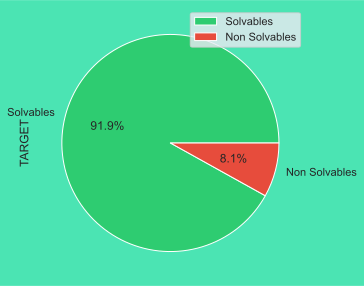

In [38]:
# Affiche l'histogramme du nombre de jours employés
(fig, ax) = plt.subplots(figsize=(12, 5))
fig.patch.set_facecolor('#00d995')
fig.patch.set_alpha(0.7)

data_train.TARGET.value_counts().plot(kind='pie',
                                     figsize=(5,5),
                                     colors=['#2ecc71', '#e74c3c'],
                                     labels=["Solvables", "Non Solvables"],
                                     autopct='%.1f%%',
                                     radius=1)
plt.legend()
plt.show()

- Observations : On observe que 92 % des prêts ont été remboursés et 8 % des clients ont été non solvables.

#### Visualisation des clients SOLVABLES (0) et les NON SOLVABLES (1).

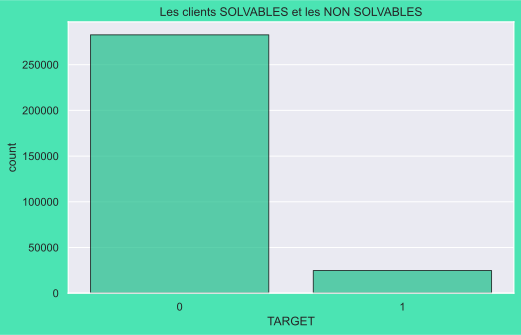

In [39]:
# Affiche l'histogramme du nombre de jours employés
(fig, ax) = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('#00d995')
fig.patch.set_alpha(0.7)

sns.countplot(data=data_train, 
              x="TARGET",
              edgecolor="black",
              color="#00d994", 
              alpha=0.7)
plt.title("Les clients SOLVABLES et les NON SOLVABLES")
plt.show()

# <font color='green'>2. Nettoyage des données </font> 

##  Création de dataset étendu 
Les jeux de données d'entrainement et de test contiennent les principales informations des clients nous allons les concaténer afin traiter les features de manière conjointe.

In [40]:
#fonction pour concaténer le testset et le trainset
def merge_train_test(df_train, df_test):
    """
    Merge les jeu d'entrainement et de test en rajoutant
    une colonne 'Test' qui prend les valeurs True ou False
    df_train(pd.DataFrame): jeu d'entrainement
    df_test(pd.DataFrame): jeu test
    """

    df_train['Test'] = False
    df_test['Test'] = True
    df_test['TARGET'] = np.nan
    app = data_train.append(data_test,
                           ignore_index=True,
                           sort=False)
    return app


In [41]:
# Merge jeu d'entrainement et jeu de test
app = merge_train_test(data_train, data_test)

<ipython-input-40-c9ec7614284d>:13: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [42]:
app.shape

(356255, 123)

In [43]:
app.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Test
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False


## Les différentes types de variables

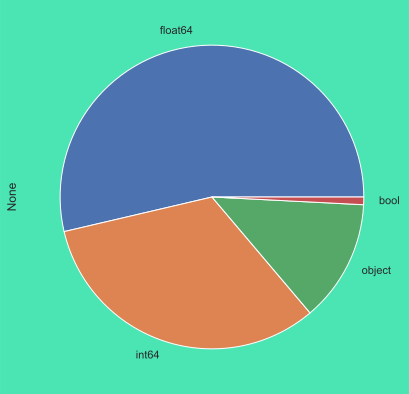

In [44]:
# Affiche l'histogramme du nombre de jours employés
(fig, ax) = plt.subplots(figsize=(7, 7))
fig.patch.set_facecolor('#00d995')
fig.patch.set_alpha(0.7)

app.dtypes.value_counts().plot.pie();

## Traitement des variables catégorielles

In [45]:
def display_cat_columns(app):
    """
    Pour chaque colonne catégorielle, indique le nombre et le nom
    des différentes valeurs prises
    """
    
    """for col in app.columns:
    if app[col].nunique()<10:
        print('Colonne {}, valeurs uniques sont :\n{}\n'.format(col, app[col].unique()))
    else:
        print('Colonne {}, {} valeurs uniques'.format(col, app[col].nunique()))""";

    for col in app:
        if app[col].dtype == object:
            print(col)
            print('Number Unique in Train:', app[~app['Test']][col].nunique())
            print('Number Unique in Test: ', app[app['Test']][col].nunique())
            print('Unique in Train: ',
                  sorted([str(e) for e in
                          app[~app['Test']][col].unique().tolist()]))
            print('Unique in Test: ',
                  sorted([str(e) for e in
                          app[app['Test']][col].unique().tolist()]))
            print('\n')

Les variables Catégorielles : observons les différentes valeurs des variables.

In [46]:
# Descriptif des variables catégorielles
display_cat_columns(app)

NAME_CONTRACT_TYPE
Number Unique in Train: 2
Number Unique in Test:  2
Unique in Train:  ['Cash loans', 'Revolving loans']
Unique in Test:  ['Cash loans', 'Revolving loans']


CODE_GENDER
Number Unique in Train: 3
Number Unique in Test:  2
Unique in Train:  ['F', 'M', 'XNA']
Unique in Test:  ['F', 'M']


FLAG_OWN_CAR
Number Unique in Train: 2
Number Unique in Test:  2
Unique in Train:  ['N', 'Y']
Unique in Test:  ['N', 'Y']


FLAG_OWN_REALTY
Number Unique in Train: 2
Number Unique in Test:  2
Unique in Train:  ['N', 'Y']
Unique in Test:  ['N', 'Y']


NAME_TYPE_SUITE
Number Unique in Train: 7
Number Unique in Test:  7
Unique in Train:  ['Children', 'Family', 'Group of people', 'Other_A', 'Other_B', 'Spouse, partner', 'Unaccompanied', 'nan']
Unique in Test:  ['Children', 'Family', 'Group of people', 'Other_A', 'Other_B', 'Spouse, partner', 'Unaccompanied', 'nan']


NAME_INCOME_TYPE
Number Unique in Train: 8
Number Unique in Test:  7
Unique in Train:  ['Businessman', 'Commercial associate

### Correction de certaines variables

- Pour la variable 'CODE_GENDER' : 

le jeu d'entrainement contient seulement 4 valeurs nommés 'XNA' pour la colonne des genres que nous allons supprimés.

In [47]:
# Suppression des individus dont le genre est 'XNA'
app = app[app['CODE_GENDER'] != 'XNA']

- Pour la variable 'NAME_INCOME_TYPE' : 

La colonne 'NAME_INCOME_TYPE' prend la valeur 'Maternity leave' uniquement pour le jeu d'entrainement et pour seulement 5 emprunteurs que nous allons supprimé. 

In [48]:
# Supprime les individus dont 'NAME_INCOME_TYPE' vient d'un congé maternité
app = app[app['NAME_INCOME_TYPE'] != 'Maternity leave']

- Pour la variable 'NAME_FAMILY_STATUS':

De la même manière, pour la colonne NAME_FAMILY_STATUS, il y a seulement deux fois la valeur Unknown et uniquement pour le jeu d'entrainement. Les lignes correspondantes sont supprimées

In [49]:
# Supprime les individus dont la statut familial est inconnu
app = app[app['NAME_FAMILY_STATUS'] != 'Unknown']

## Traitement des variables numériques

- Variable 'DAYS_EMPLOYED'

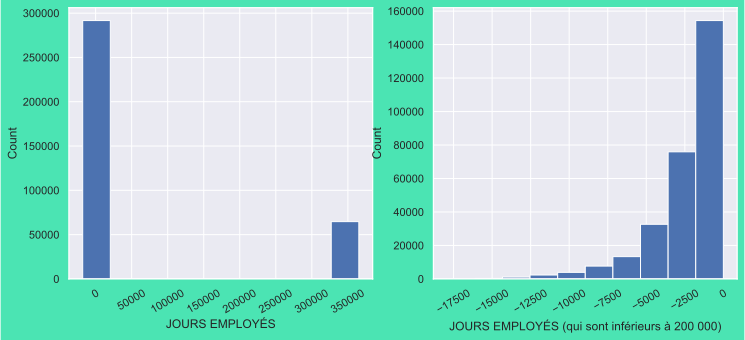

In [50]:
# Affiche l'histogramme du nombre de jours employés
(fig, ax) = plt.subplots(figsize=(12, 5))
fig.patch.set_facecolor('#00d995')
fig.patch.set_alpha(0.7)

plt.subplot(1, 2, 1)
app['DAYS_EMPLOYED'].hist()
plt.xlabel('JOURS EMPLOYÉS')
plt.ylabel('Count')
plt.xticks(rotation=30)

# Affiche l'histogramme pour les valeurs normales
plt.subplot(1, 2, 2)
app.loc[app['DAYS_EMPLOYED'] < 200000, 'DAYS_EMPLOYED'].hist()
plt.xlabel('JOURS EMPLOYÉS (qui sont inférieurs à 200 000)')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

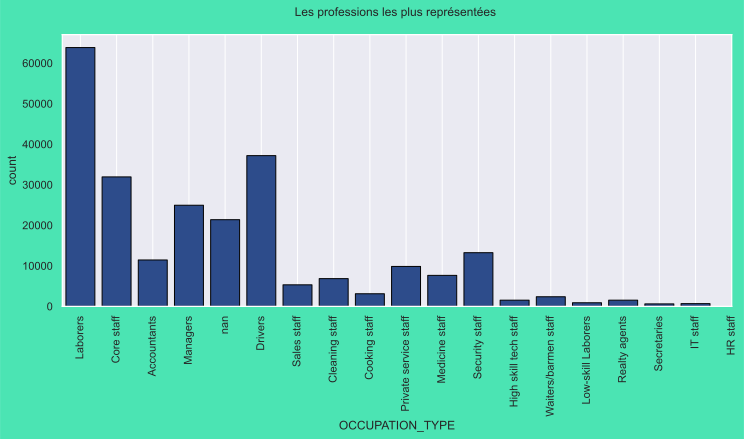

In [51]:
(fig, ax) = plt.subplots(figsize=(12, 5))
fig.patch.set_facecolor('#00d995')
fig.patch.set_alpha(0.7)

plt.title("Les professions les plus représentées \n")
sns.countplot(data=app,
              x="OCCUPATION_TYPE",
              edgecolor='black',
              color="#1d479b")
plt.xticks(range(0,app["OCCUPATION_TYPE"].nunique()+1)
           ,app["OCCUPATION_TYPE"].unique(),rotation=90)
plt.grid()

## Traitement des outliers

In [52]:
# Affiche les valeurs abérrantes
values_to_nan = app.loc[app['DAYS_EMPLOYED'] > 366, 'DAYS_EMPLOYED'].unique()
print(values_to_nan)

[365243]


In [53]:
# Remplace la valeur abérrante par NaN
app['DAYS_EMPLOYED'].replace(values_to_nan, np.nan, inplace=True)

### Sauvegarde des données non encore encodées

In [54]:
# Sauvegade de la base de données nettoyées non encodée
app.to_csv("app_no_encoded_no_featureengineering.csv")

# <font color='green'>3. Feature Engineering </font> 


## Feature Engineering "automatisé"

Tout d'abord, nous initialisons un EntitySet. Si vous souhaitez lui donner un nom, vous pouvez éventuellement fournir un identifiant au constructeur.

### Adding entities

Pour commencer, nous chargeons le dataframe des applications en tant qu'entité.

In [55]:
#pip install featuretools

In [56]:
# Feature engineering
# Create an entity set
#import featuretools.variable_types as vtype 
import featuretools as ft
es = ft.EntitySet(id='applications')

Ancienne version:
https://stackoverflow-com.translate.goog/questions/69665765/featuretoolsentityset-object-has-no-attribute-entity-from-dataframe?_x_tr_sl=en&_x_tr_tl=fr&_x_tr_hl=fr&_x_tr_pto=sc

In [57]:
from woodwork.logical_types import Categorical, PostalCode
# Ancienne Version
es = es.entity_from_dataframe(entity_id = "applications",
                              dataframe=app,
                              index="SK_ID_CURR")

es

Entityset: applications
  Entities:
    applications [Rows: 356244, Columns: 123]
  Relationships:
    No relationships

In [58]:
# Affiche le type de chaque colonne
#es['applications']

#### Observation :
 
- Changeons le typage de certaines variables de type 'numeric' alors qu'elles devraient être de type 'boolean'.

In [59]:
#conda install -c conda-forge featuretools

### Définition de relations entre les dataframes

In [60]:
# Define which primitives to use
agg_primitives =  ['count', 'median']
trans_primitives = ['cum_sum']

In [61]:
# Liste de toutes les variables
app.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

### Suppression des features à faible information

In [62]:
# Remove low information features
app = selection.remove_low_information_features(app)
print("Le nombre de colonnes est de {}".format(len(app.columns)))

Le nombre de colonnes est de 123


In [63]:
app.shape

(356244, 123)

In [64]:
app.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Test
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.0,...,0.0369,0.9722,0.6243,0.0144,0.0,0.069,0.0833,0.125,0.0375,0.0205,0.0193,0.0,0.0,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False


In [65]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,356244.000000,307500.000000,356244.000000,3.562440e+05,3.562440e+05,356208.000000,3.559680e+05,356244.000000,356244.000000,291596.000000,356244.000000,356244.000000,121011.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.000000,162338.000000,3.555760e+05,286617.000000,176301.000000,148665.000000,183386.000000,119945.000000,107893.000000,167169.000000,177842.000000,179908.000000,115144.000000,145407.000000,113273.000000,178347.000000,109391.000000,160484.000000,176301.000000,148665.000000,183386.000000,119945.000000,...,113273.000000,178347.000000,109391.000000,160484.000000,176301.000000,148665.000000,183386.000000,119945.000000,107893.000000,167169.000000,177842.000000,179908.000000,115144.000000,145407.000000,113273.000000,178347.000000,109391.000000,160484.000000,185194.000000,355194.000000,355194.000000,355194.000000,355194.000000,356243.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.000000,356244.00000,356244.000000,356244.000000,356244.000000,356244.000000,308681.000000,308681.000000,308681.000000,308681.000000,308681.000000,308681.000000
mean,278128.489715,0.080725,0.414300,1.701154e+05,5.877670e+05,27425.487312,5.280181e+05,0.020917,-16041.313002,-2396.683247,-4983.621175,-3002.072372,12.023799,0.999994,0.818492,0.200090,0.998170,0.278601,0.071215,2.151834,2.050505,2.028930,12.055684,0.015649,0.051366,0.040843,0.078079,0.229663,0.178824,0.501960,5.148884e-01,0.509353,0.118139,0.088674,0.977889,0.752281,0.045046,0.079819,0.150017,0.227331,0.232818,0.066455,0.101496,0.108091,0.008868,0.028504,0.114916,0.087751,0.977238,0.759450,...,0.106383,0.106642,0.008116,0.027184,0.118550,0.088179,0.977903,0.755546,0.044995,0.078931,0.149496,0.226922,0.232505,0.067296,0.102676,0.109280,0.008697,0.028386,0.103194,1.425691,0.143440,1.409430,0.100185,-978.587287,0.000036,0.720526,0.000084,0.015063,0.087

### Feature engineering "Manuelle"

Dans cette étape de 'Feature Engineering' nous allons créer de nouvelles features pertinentes issues de celles existantes pour aider le modèle.

- Le ratio temps travaillé/âge

- Le ratio crédit/revenu

- Le ratio revenu/annuité

- Le ratio revenu/annuité/âge

- Le ratio crédit/annuité

- Le ratio crédit/annuité/âge

In [66]:
def manual_feature_engineering(app) :
    
    #Certaines compositions pertinentes de variables permettent d'aider le modèle
    
    app['PROPORTION_LIFE_EMPLOYED'] = app['DAYS_EMPLOYED'] / app['DAYS_BIRTH']
    app['INCOME_TO_CREDIT_RATIO'] = app['AMT_INCOME_TOTAL'] / app['AMT_CREDIT'] 
    app['INCOME_TO_ANNUITY_RATIO'] = app['AMT_INCOME_TOTAL'] / app['AMT_ANNUITY']
    app['INCOME_TO_ANNUITY_RATIO_BY_AGE'] = app['INCOME_TO_ANNUITY_RATIO'] * app['DAYS_BIRTH']
    app['CREDIT_TO_ANNUITY_RATIO'] = app['AMT_CREDIT'] / app['AMT_ANNUITY']
    app['CREDIT_TO_ANNUITY_RATIO_BY_AGE'] = app['CREDIT_TO_ANNUITY_RATIO'] * app['DAYS_BIRTH']
    app['INCOME_TO_FAMILYSIZE_RATIO'] = app['AMT_INCOME_TOTAL'] / app['CNT_FAM_MEMBERS']
    
    return app


In [67]:
# Feature engineering manuel
app = manual_feature_engineering(app)

In [68]:
app.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Test,PROPORTION_LIFE_EMPLOYED,INCOME_TO_CREDIT_RATIO,INCOME_TO_ANNUITY_RATIO,INCOME_TO_ANNUITY_RATIO_BY_AGE,CREDIT_TO_ANNUITY_RATIO,CREDIT_TO_ANNUITY_RATIO_BY_AGE,INCOME_TO_FAMILYSIZE_RATIO
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,0.067329,0.498036,8.198215,-77563.308435,16.461104,-155738.505192,202500.0
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.070862,0.208736,7.563343,-126799.445355,36.234085,-607464.442834,135000.0


In [69]:
app.shape

(356244, 130)

### Sauvegarde des données structurés non encodées

In [70]:
# Sauvegarde des résultats
app.to_csv("app_no_enconded_featureengineering.csv")

# <font color='green'>3. Traitement des valeurs manquantes </font> 

### Pourcentage des valeurs manquantes

In [71]:
def missing_values(df, display=False, printf=True, top_n_missing=30, title=""): 
    
    # Calcul de la proportion de données manquantes pour chaque colonne

    null_prop = df.isnull().sum(axis=0).sum()/len(df)/len(df.columns)*100
    null = df.isnull().sum(axis=0).sort_values()/len(df)*100
    
    if printf:
        print("Le pourcentage moyen de valeurs manquantes est de {:.2f}%".format(null_prop))
    
    # Si display=True, plot :
    if display :
        fig = plt.figure(figsize=(14, 6))
        plt.axhline(y=null_prop, color='k', linestyle='--', lw=2)
        plt.legend(['{:.2f}% global de données manquantes'.format(null_prop)], fontsize=13)

        data_to_plot = pd.DataFrame(null).sort_values(by = 0, ascending=False)[0: top_n_missing]
        
        sns.barplot(data_to_plot.index, data_to_plot[0])
        plt.ylabel("%")
        plt.title(title)
        labels = ['\n'.join(wrap(l, top_n_missing)) for l in data_to_plot.index]        
        plt.xticks(range(len(labels)), labels, rotation='vertical')
        
        plt.show()
    else :
        return null

In [72]:
# On récupère les données d'entrainement
data_train = app[app['Test'] == False]
# On r"cupère les données test
data_test = app[app['Test'] == True]


In [73]:
missing_values(data_train,
               display=False,
               title="Pourcentage de valeurs manquantes pour le jeu d'entrainement")

Le pourcentage moyen de valeurs manquantes est de 23.17%


SK_ID_CURR                         0.000000
REG_REGION_NOT_LIVE_REGION         0.000000
REG_REGION_NOT_WORK_REGION         0.000000
LIVE_REGION_NOT_WORK_REGION        0.000000
REG_CITY_NOT_LIVE_CITY             0.000000
REG_CITY_NOT_WORK_CITY             0.000000
LIVE_CITY_NOT_WORK_CITY            0.000000
ORGANIZATION_TYPE                  0.000000
FLAG_DOCUMENT_2                    0.000000
FLAG_DOCUMENT_3                    0.000000
FLAG_DOCUMENT_4                    0.000000
FLAG_DOCUMENT_5                    0.000000
FLAG_DOCUMENT_6                    0.000000
FLAG_DOCUMENT_7                    0.000000
FLAG_DOCUMENT_8                    0.000000
FLAG_DOCUMENT_9                    0.000000
FLAG_DOCUMENT_10                   0.000000
FLAG_DOCUMENT_11                   0.000000
FLAG_DOCUMENT_12                   0.000000
FLAG_DOCUMENT_13                   0.000000
FLAG_DOCUMENT_14                   0.000000
FLAG_DOCUMENT_15                   0.000000
FLAG_DOCUMENT_16                

In [74]:
missing_values(data_test,
               display=False,
               title="Pourcentage de valeurs manquantes pour le jeu test")

Le pourcentage moyen de valeurs manquantes est de 23.23%


SK_ID_CURR                          0.000000
REG_REGION_NOT_WORK_REGION          0.000000
LIVE_REGION_NOT_WORK_REGION         0.000000
REG_CITY_NOT_LIVE_CITY              0.000000
REG_CITY_NOT_WORK_CITY              0.000000
LIVE_CITY_NOT_WORK_CITY             0.000000
ORGANIZATION_TYPE                   0.000000
DAYS_LAST_PHONE_CHANGE              0.000000
FLAG_DOCUMENT_2                     0.000000
FLAG_DOCUMENT_3                     0.000000
FLAG_DOCUMENT_4                     0.000000
FLAG_DOCUMENT_5                     0.000000
FLAG_DOCUMENT_6                     0.000000
FLAG_DOCUMENT_7                     0.000000
FLAG_DOCUMENT_8                     0.000000
FLAG_DOCUMENT_9                     0.000000
FLAG_DOCUMENT_10                    0.000000
FLAG_DOCUMENT_11                    0.000000
FLAG_DOCUMENT_12                    0.000000
FLAG_DOCUMENT_13                    0.000000
FLAG_DOCUMENT_14                    0.000000
FLAG_DOCUMENT_15                    0.000000
FLAG_DOCUM

### Suppression des valeurs manquantes de plus 90%

In [75]:
def drop_missing_values(app):

    # On récupère les données d'entrainement
    data_train = app[app['Test'] == False]
    # On r"cupère les données test
    data_test = app[app['Test'] == False]
    
    # Détermine la proportion de valeurs manquantes pour les données d'entrainement
    missing_train = missing_values(data_train, printf=False)
    # Détermine la proportion de valeurs manquantes pour les données test
    missing_test = missing_values(data_test, printf=False)
    
    # Défini la liste des variables dont les valeurs manquantes sont supérieurs à 10%
    # Jeu d'entrainement
    var_missing_values_train = list(missing_train[missing_train > 90].index)
    # Jeu test
    var_missing_values_test = list(missing_test[missing_test > 90].index)
    # Concaténation des variables + suppression des doublons
    var_missing_values = list(set(var_missing_values_train + var_missing_values_test))
    
    # Suppression des colomnes dont les valeurs sont manquantes
    app.drop(columns=var_missing_values, inplace=True)
    
    # Affiche le nouveau pourcentage de valeurs manquantes
    null_prop = app.isnull().sum(axis=0).sum()/len(app)/len(app.columns)*100

    print('Le nouveau pourcentage de valeurs manquantes est de {:.2f}%'.format(null_prop))
    return app

In [76]:
app = drop_missing_values(app)

Le nouveau pourcentage de valeurs manquantes est de 23.18%


# <font color='green'>4. Encodage des variables catégorielles </font> 

Les variables catégorielles doivent être encodés pour être utilisables par les modèles. 
- Les variables cycliques comme les jours de la semaine sont encodées en deux dimensions.
- Les variables contenant uniquement 2 classes sont assignées à des 0 ou et des 1. 
- Pour les variables à plus de 2 classes, un OneHotEncoder est appliqué.

### Les 'variables temporelles'

La colomne 'WEEKDAY_APPR_PROCESS_START' contient des informations catégorielles concernant le jour de la semaine.
- Une manière communément utilisée en ML est d'encoder la variable en deux dimensions en utilisant un système de coordonnées polaires. 
- Les jours de la semaine sont alors représentés sur un cercle et le nombre de dimensions est réduit par rapport à un one-hot-encoding.

In [77]:
def polar_projection(app, col):

    # Create map from categories to polar projection
    DOW_map = {
        'MONDAY':    0,
        'TUESDAY':   1,
        'WEDNESDAY': 2,
        'THURSDAY':  3,
        'FRIDAY':    4,
        'SATURDAY':  5,
        'SUNDAY':    6,
    }
    DOW_map1 = {k: np.cos(2*np.pi*v/7.0) for k, v in DOW_map.items()}
    DOW_map2 = {k: np.sin(2*np.pi*v/7.0) for k, v in DOW_map.items()}

    # Show encoding of days of week -> circle
    days = ['MONDAY', 'TUESDAY', 'WEDNESDAY', 'THURSDAY', 'FRIDAY', 'SATURDAY', 'SUNDAY']
    tt = np.linspace(0, 2*np.pi, 200)
    xx = np.cos(tt)
    yy = np.sin(tt)
    plt.plot(xx, yy)
    plt.gca().axis('equal')
    plt.xlabel('Encoded Dimension 1')
    plt.ylabel('Encoded Dimension 2')
    plt.title('2D Projection of days of the week')
    for day in days:
        plt.text(DOW_map1[day], DOW_map2[day], day, ha='center')
    plt.show()
    
    # WEEKDAY_APPR_PROCESS_START to polar coords
    app[col + '_1'] = app[col].map(DOW_map1)
    app[col + '_2'] = app[col].map(DOW_map2)
    app.drop(columns=col, inplace=True)
    
    return app


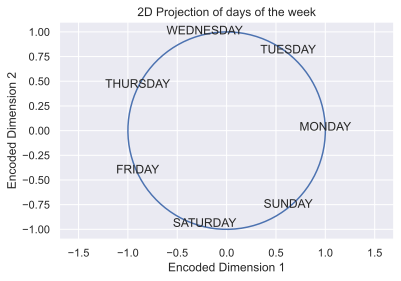

In [78]:
app = polar_projection(app, col='WEEKDAY_APPR_PROCESS_START')

Cet encodage conserve le caractère cyclique des jours de la semaine, tout en limitant le nombre de dimensions.

###  Fonctions pour encoder les autres variables catégorielles

In [79]:
# encodage des variables catégorielles
def cat_encoder(app):
    
    """
    Encode les variables catégorielles avec un label encoder ou un one hot encoding suivant
    le nombre de valeurs différentes prises par chaque variable    
    """

    # Label encoder
    label_encoder = LabelEncoder()
    
    # categorials features to one hot encode
    cat_features = []
    col_to_del = []
    
    for col in app: 
        if col != 'Test' and col != 'TARGET':
            # Add indicator columns for empty values
            app_null = app[col].isnull()
            if app_null.sum() > 0:
                app[col + '_ISNULL'] = app_null
                col_to_del.append(col + '_ISNULL')

            if app[col].dtype == object: 
                # Label encode binary fearures in training set
                if app[col].nunique() == 2:
                    if col + '_ISNULL' in app.columns:  # missing values here?
                        app.loc[app[col + '_ISNULL'], col] = 'NaN'
                    app[col] = label_encoder.fit_transform(app[col])
                    if col + '_ISNULL' in app.columns:  # re-remove missing vals
                        app.loc[app[col + '_ISNULL'], col] = np.nan
                # get colunms to one hot encode
                elif app[col].nunique() > 2:
                    cat_features.append(col)

    # One-hot encode categorical features in train set
    app = pd.get_dummies(app, columns=cat_features)
    
    # Suppresion des colonnes nulles          
    app.drop(columns=col_to_del, inplace=True)
    
    return app

In [80]:
# Appel à la fonction Enconder des variables catégorielles
app = cat_encoder(app)

### Sauvegarde des données pré-traités dans un fichier .csv

In [81]:
# Sauvegarde des données
app.to_csv("app_encoded.csv")

# <font color='blue'>II. Modélisation </font> 

In [82]:
# Lecture des données finales pour le modèle
app = pd.read_csv("app_encoded.csv", sep=',',
                  index_col=0, encoding='utf8')

# Lecture des données brutes (non encodés et sans 'feature engineering')
app_no_encoded = pd.read_csv("app_no_enconded_featureengineering.csv")

In [83]:
app.shape

(356244, 241)

In [84]:
app.fillna(app.mean(), inplace=True)

In [85]:
app['TARGET'].head()

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: TARGET, dtype: float64

# <font color='green'>3. Séléction d'un modèle Machine Learning</font> 

In [86]:
# Divise app en jeu test et entrainement
train_set = app.loc[~app['Test'], :]
test_set = app.loc[app['Test'], :]

# Ensure all data is stored as floats
train_set = train_set.astype(np.float64)
train_set.drop(columns=["Test"], inplace=True)
test_set = test_set.astype(np.float64)
test_set.drop(columns=["Test"], inplace=True)

# Target labels
y_train = train_set['TARGET']
y_test = test_set["TARGET"]

# Remove test/train indicator column and target column
x_train = train_set.drop(columns=['TARGET'])
x_test = test_set.drop(columns=['TARGET'])

## Transformation des données

Pipeline d'imputation des valeurs manquantes et standardisation

In [87]:
# Pipeline de standardisation et d'imputation des valeurs manquantes
var_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
])

Sépération du jeu d'entrainement en entrainement puis validation

"""# Division des données en trainset et testset
from sklearn.model_selection import train_test_split

preprocessor = make_column_transformer((RobustScaler(),ColumnsNum),(OneHotEncoder(handle_unknown = 'ignore'),ColumnsCat))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 20% des données pour test""";

In [88]:
# On split le jeu d'entrainement en entrainement et test
from sklearn.model_selection import train_test_split
train_set, valid_set = train_test_split(train_set, test_size=0.2, random_state=42)

In [89]:
# Sauvegarde des jeux de données d'entrainement et de validation
train_set.to_csv("app_train.csv")
valid_set.to_csv("app_valid.csv")

## Liste des classifieurs étudiés

In [90]:
# Dictionnaire de classifieurs 
classifiers_1 = { 'Dummy Classifier': DummyClassifier(),
                  'Random Forest': RandomForestClassifier(n_estimators=100),
                  'Xgboost': XGBClassifier(),
                  'LGBM': LGBMClassifier()
              }

In [91]:
# Pipeline de transformations + classification
def define_pipeline(preprocessor, classifier) :
    
    pipe = Pipeline([("preprocess", preprocessor),
                     ("regressor", classifier),
                    ])
    return pipe

In [92]:
# Fonction pour afficher la courbe ROC pour les différents modèles testés

def plot_roc_curve(classifiers, var_pipeline, X, y, n_splits=5, fit=True):

    kf = KFold(n_splits=n_splits)    
    for name_clf, clf in classifiers.items():
        print(name_clf)
        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
        for i, (train, test) in enumerate(kf.split(X, y)):

            full_pipeline = define_pipeline(var_pipeline, clf)
            
            if fit :
                full_pipeline.fit(X.iloc[train, :], y.iloc[train])

            y_pred_grd = full_pipeline.predict_proba(X.iloc[test, :])[:, 1]
            fpr, tpr, _ = roc_curve(y.iloc[test], y_pred_grd)

            interp_tpr = np.interp(mean_fpr, fpr, tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            auc_ = auc(fpr, tpr)

            aucs.append(auc_)

        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = auc(mean_fpr, mean_tpr)
        std_auc = np.std(aucs)
        plt.plot(mean_fpr, mean_tpr,
            label=name_clf + r'(AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2,
            alpha=.8)

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

Dummy Classifier
Random Forest
Xgboost
LGBM


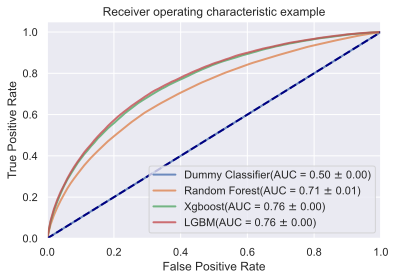

In [93]:
# Appel à la fonction
plot_roc_curve(classifiers_1, 
               var_pipeline, 
               train_set.drop(columns="TARGET"), train_set["TARGET"])

#### Le meilleur modèle est le LGBMClassifier (Light Gradient Boosting Machine)
- LightGBM est un framework de renforcement de gradient basé sur des arbres de décision pour augmenter l'efficacité du modèle et réduire l'utilisation de la mémoire. 
- Il utilise deux nouvelles techniques : l'échantillonnage unilatéral basé sur le gradient et le groupement exclusif de fonctionnalités (EFB) qui répond aux limites de l'algorithme basé sur l'histogramme qui est principalement utilisé dans tous les cadres GBDT (Gradient Boosting Decision Tree). 

## Matrice de confusion
Il s'agit d'une classification binaire 0 ou 1, solvable ou non, négatif ou positif.

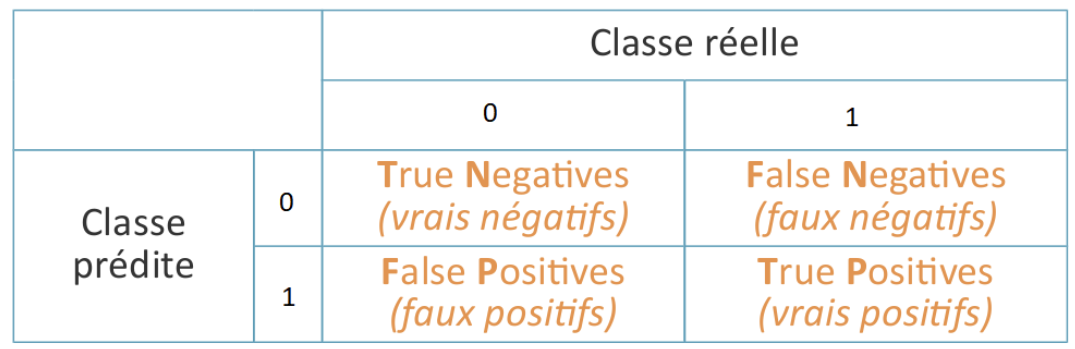

#### Interprétation
- Les individus dont la valeur cible réelle est 0 et dont la prédiction est 0 sont les 'True Negatives' dits aussi 'TN'

- Les individus dont la valeur cible réelle est 0 alors que la prédiction est 1 sont les 'False Negatives' appelés aussi 'FN'

- Les individus dont la valeur cible réelle est 1 alors que la prédiction est 0 sont les 'False Positives' appelés aussi 'FP'

- Les individus dont la valeur cible réelle est 1 et dont la prédiction est 1 sont les 'True Positives' appelés aussi 'TP'

# <font color='green'>2. Optimisation </font> 
## Optimisation des hyperparamètres

In [95]:
conda install -c conda-forge hyperopt 

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - hyperopt


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    hyperopt-0.2.7             |     pyhd8ed1ab_0         771 KB  conda-forge
    py4j-0.10.9.5              |     pyhd8ed1ab_0         181 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         952 KB

The following NEW packages will be INSTALLED:

  hyperopt           conda-forge/noarch::hyperopt-0.2.7-pyhd8ed1ab_0
  py4j               conda-forge/noarch::py4j-0.10.9.5-pyhd8ed1ab_0



hyperopt-0.2.7       | 771 KB    | ##################################### | 100% 
py4j-0.10.9.5        | 181 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: 

In [96]:
#Fonction d'optimisation pour le choix des hyperparamètres
# Packages hyperopt pour la séléction d'hyperparamètres
from hyperopt import hp, tpe
from hyperopt.fmin import fmin
from imblearn.over_sampling import SMOTE
skf = StratifiedKFold(n_splits=5)
def model_v1(predictor, pipeline, features, eval_metric, cv=skf):
    
    
    # Extract the ids
    train_ids = features.index

    # Extract the targets for training
    targets = features['TARGET']
    
    # Remove the ids and target
    features = features.drop(columns=['TARGET'])
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Apply the pipeline
    features = pipeline.fit_transform(features)
    targets = np.array(targets)    
    
    # Increase the data to get a bigger proportion of positif targets
    sm = SMOTE(random_state=42, sampling_strategy=0.2) # the ratio is chosen
    # to correspond to the pareto law with the 80%/20% ratio
    features_res, targets_res = sm.fit_sample(features, targets.ravel())  

    def optim_score(params,
                    model=predictor,
                    x_train=features_res,
                    y_train=targets_res,
                    cv=cv,
                    eval_metric=eval_metric):

        # the function gets a set of variable parameters in "param"
        params_model = {'n_estimators': int(params['n_estimators']), 
                        'max_depth': int(params['max_depth']), 
                        'learning_rate': params['learning_rate'],
                        'subsample': params['subsample'],
                        'colsample_bytree': params['colsample_bytree'],
                        'num_leaves': int(params['num_leaves']),
                        'reg_alpha': params['reg_alpha'],
                        'reg_lambda': params['reg_lambda'],
        }

        # asssigne les paramètres du modèle
        model.set_params(**params_model)
        
        # Seuil de solvabilité
        threshold = params['solvability_threshold']

        # Cross-validation à 5 passes : retourne le score de probabilité
        y_proba = cross_val_predict(model,
                                    x_train,
                                    y_train,
                                    method='predict_proba',
                                    cv=cv)[:, 1]
       
        # Si proba > seuil alors la prédiction est positive : 1
        y_pred = (y_proba > threshold)
        y_pred = np.array(y_pred > 0) * 1
        
        # Calcul du score suivant la métrique utilisé
        score = eval_metric(y_train, y_pred)

        return 1 - score # Retourne le score

 
    # possible values of parameters
    space={'n_estimators': hp.quniform('n_estimators', 200, 2000, 200),
           'max_depth' : hp.quniform('max_depth', 2, 30, 2),
           'learning_rate': hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)),
           'subsample': hp.quniform('subsample', 0.1, 1.0, 0.2),
           'colsample_bytree': hp.quniform('colsample_by_tree', 0.6, 1.0, 0.1),
           'num_leaves': hp.quniform('num_leaves', 4, 100, 4),
           'reg_alpha': hp.quniform('reg_alpha', 0.1, 1.0, 0.1),
           'reg_lambda': hp.quniform('reg_lambda', 0.1, 1.0, 0.1),
           'solvability_threshold': hp.quniform('solvability_threshold', 0.0, 1.0, 0.025)
    }


    best=fmin(fn=optim_score, # function to optimize
              space=space, 
              algo=tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically
              max_evals=10, # maximum number of iterations
    )

    # computing the score on the test set
    predictor.set_params(
                   n_estimators=int(best['n_estimators']),
                   max_depth=int(best['max_depth']),
                   learning_rate=best['learning_rate'],
                   subsample=best['subsample'],           
                   colsample_bytree=best['colsample_by_tree'],
                   num_leaves=int(best['num_leaves']),
                   reg_alpha=best['reg_alpha'],
                   reg_lambda=best['reg_lambda'],
                    
    )
    
    # Entrainement du modèle sur tout le jeux de données
    predictor.fit(features, targets)

    # Record the best parameters
    best_parameters = best
    
    # Assemblage de pipeline
    full_pipeline = define_pipeline(pipeline, predictor)

    # Record the feature importances
    feature_importance_values = full_pipeline[-1].feature_importances_
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names,
                                        'importance': feature_importance_values})

    return best_parameters, feature_importances, full_pipeline

=================Fonction de coût métier=====================


Le modèle final doit pouvoir déterminer une classe 0 ou 1, ce qui implique de déterminer le seuil à partir duquel la proba calculée se 
transforme en classe 1 (pour un predict le seuil par défaut est 0.5). Une possibilité serait d’optimiser ce seuil en se basant sur la mesure 
« technique » du f1 score, mais ne prend pas en compte le contexte « métier »


La problématique « métier » est de prendre en compte qu’un faux positifs (bon client considéré comme mauvais = crédit non accordé à tort,
 donc manque à gagner de la marge pour la banque) n’a pas le même coût qu’un faux négatif (mauvais client à qui on accorde un prêt, donc perte sur le 
capital non remboursé). 


Un faux négatif est environ 10 fois plus coûteux qu’un faux positif. Les mesures techniques tels que le f1 score ne le prennent pas en compte


Il est attendu de mettre en œuvre une approche simple qui consiste, une fois le modèle choisi et les hyperparamètres optimisés finement d’un point de vue 
technique via l’AUC (CF étape précédente), de calculer une fonction de coût métier de type 10*FN + FP (où FN = nombre de FN dans la matrice de confusion 
pour un seuil donné, FP = nombre de FP) et de trouver son minimum pour un seuil donné.


Une possibilité de fonction métier adaptée au projet est la fonction fbeta_score de sklearn, qui permet d’attribuer plus de poids à la minimisation des
FN à travers la pondération du paramètre beta

## Optimisation métrique métier

La métrique banking ici crée, consiste à calculer le gain obtenu pour l'ensemble des individus du jeu de données.


Pour cela nous avons fixé un poids arbitraire pour chacune des prédictions relativement à leurs valeurs réelles.


Les valeurs des poids sont les suivantes :

- fn_value = -10
- tp_value = 0
- tn_value = 1
- fp_value = 0


De ce fait, les prêts accordés aux individus qui ne sont finalement pas solvables sont dotés d'une pénalisation négative de -10, alors que les prêts accordés aux individus finalement solvables rapportent 1. Ce rapport 10 est totalement arbitraire et il est tout à fait possible de changer ces valeurs à la convenance de l'optique métier. Il faudra cependant relancer l'optimisation des hyper-paramètres du modèle.

### Définition de la métrique 'banking'

In [97]:
# Metrics de ML
from sklearn.metrics import auc, roc_curve, roc_auc_score, make_scorer
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def Ind_bank(y_true, y_pred, fn_value=-10, fp_value=0, tp_value=0, tn_value=1):

    # Matrice de Confusion
    mat_conf = confusion_matrix(y_true, y_pred)
    
    # Nombre de True Negatifs
    tn = mat_conf[0, 0]
    # Nombre de Faux Négatifs
    fn = mat_conf[1, 0]
    # Nombre de Faux Positifs
    fp = mat_conf[0, 1]
    # Nombre de True Positifs
    tp = mat_conf[1, 1]
    
    # Gain total
    J = tp*tp_value + tn*tn_value + fp*fp_value + fn*fn_value
    
    # Gain maximum
    max_J = (fp + tn)*tn_value + (fn + tp)*tp_value
    
    # Gain minimum
    min_J = (fp + tn)*fp_value + (fn + tp)*fn_value
    
    # Gain normalisé entre 0 et 1
    J_normalized = (J - min_J)/(max_J - min_J)
    
    return J_normalized  # Retourne la fonction d'évaluation

In [98]:
best_parameters_0, feature_importance_0, clf_0 = model_v1(LGBMClassifier(),
                                                          var_pipeline,
                                                          train_set,
                                                          eval_metric=Ind_bank)

100%|██████████| 10/10 [55:12<00:00, 331.23s/trial, best loss: 0.26648423304936764] 


In [99]:
# Affichage des meilleurs hyper-paramètres
best_parameters_0

{'colsample_by_tree': 0.6000000000000001,
 'learning_rate': 0.09602247109761951,
 'max_depth': 8.0,
 'n_estimators': 200.0,
 'num_leaves': 84.0,
 'reg_alpha': 0.6000000000000001,
 'reg_lambda': 0.30000000000000004,
 'solvability_threshold': 0.25,
 'subsample': 0.2}

Le meilleur seuil de solvabilité est de 0.25, autrement dit que, tous les clients dont les valeurs de prédictions sont inférieurs à 0.25 ne sont pas solvables.

In [100]:
conda install -c conda-forge pickle5

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.

# >>>>>>>>>>>>>>>>>>>>>> ERROR REPORT <<<<<<<<<<<<<<<<<<<<<<

    Traceback (most recent call last):
      File "/opt/anaconda3/lib/python3.8/site-packages/urllib3/response.py", line 697, in _update_chunk_length
        self.chunk_left = int(line, 16)
    ValueError: invalid literal for int() with base 16: b''
    
    During handling of the above exception, another exception occurred:
    
    Traceback (most recent call last):
      File "/opt/anaconda3/lib/python3.8/site-packages/urllib3/response.py", line 438, in _error_catcher
        yield
      File "/opt/anaconda3/lib/python3.8/site-packages/urllib3/response.py", line 764, in read_chunked
        self._update_chunk_length()
      File "/opt/anaconda3/lib/python3.8/site-packages/urllib3/response.py", line 701, in _update_chunk_length
    

Upload did not complete.

Note: you may need to restart the kernel to use updated packages.


In [101]:
# Sauvegarde du modèle banking
import pickle
pickle.dump(clf_0, open('banking_model_f0.md', 'wb'))

# <font color='green'>2. Evolution du gain en fonction du seuil de solvabilité </font> 

In [102]:
def gain_seuil(clf, y_set, x_set):
    
    """
    Evolution du gain en fonction du seuil de solvabilité fixé
    Si score < seuil : client solvable
    Sinon : client non solvable
    
    """
    cost_function = []
    threshold_x = np.linspace(0.0, 1, 20)
    
    for threshold in threshold_x:
        
        # Score du modèle : 0 à 1
        y_scores = clf.predict_proba(x_set)[:, 1]
        
        # Score > seuil de solvabilité : retourne 1 sinon 0
        y_pred = (y_scores > threshold)
        
        y_pred = np.array(y_pred > 0) * 1
        # Calcul de l'indice bancaire
        cost_function.append(Ind_bank(y_set, y_pred))
        
    # Affichage du gain en fonction du seuil de solvabilité    
    plt.plot(threshold_x, cost_function)
    plt.xlabel("Seuil de probabilité")
    plt.ylabel("Indice banquaire")
    plt.xticks(np.linspace(0.1, 1, 10))

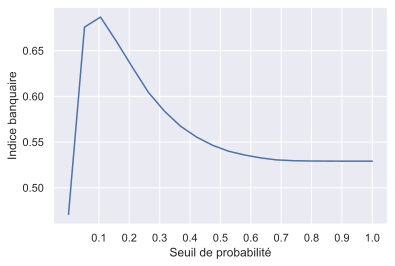

In [103]:
# Affiche le meilleur seuil de probabilité
gain_seuil(clf_0, valid_set["TARGET"], valid_set.drop(columns=["TARGET"]))

On trouve ici, graphiquement, que le meilleur seuil de solvabilité est de 0.1 contrairement à celui trouvé par l'optimisation via hyperopt qui est de 0.25.


Le gain obtenu avec un seuil de 0.1 est plus conséquent que pour un seuil par défaut de 0.25 fixé par LGBM.

### Optimisation métrique technique : f1_score
La métrique f1_score est la moyenne harmonique de la précision et du rappel.

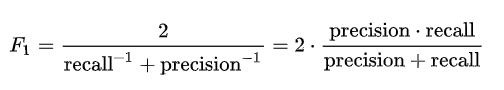

Alors que la moyenne ordinaire traite de la même manière toutes les valeurs, la moyenne harmonique donne plus de poids aux faibles valeurs. Par conséquent, le classificateur n'obtiendra un bon score F1 que si son rappel et sa précision sont élevés.


La précision est l'exactitude des prédictions positives :

- précision = TP / (TP + FP)


TP (abréviation de l'anglais True Positive) est le nombre de vrais positifs et FP est le nombre de faux positifs.

Quant au rappel, c'est le taux d'observations positives ayant été correctement détectées par le classficateur

- rappel = TP / (TP + FN)


FN est le nombre de faux positifs.

In [104]:
# Optimisation pour la métrique 'roc_auc'
best_parameters_1, feature_importance_1, clf_1 = model_v1(LGBMClassifier(),
                                                          var_pipeline,
                                                          train_set,
                                                          eval_metric=f1_score)

100%|██████████| 10/10 [1:12:21<00:00, 434.20s/trial, best loss: 0.2833649409833282]


In [105]:
# Affichage des meilleurs hyper-paramètres
best_parameters_1

{'colsample_by_tree': 0.7000000000000001,
 'learning_rate': 0.12505677916179395,
 'max_depth': 18.0,
 'n_estimators': 1600.0,
 'num_leaves': 16.0,
 'reg_alpha': 0.6000000000000001,
 'reg_lambda': 0.9,
 'solvability_threshold': 0.675,
 'subsample': 0.2}

### Sauvegarde des résultats

In [106]:
filename = 'banking_model_f1.md'
# Sauvegarde du modèle
pickle.dump(clf_1, open(filename, 'wb'))

## Comparaison des résultats pour les deux métriques

# <font color='green'>3. Matrices de confusion </font> 

Fonction permettant d'afficher plusieurs matrices de confusions en fonctions des différentes prédictions

In [107]:
def plot_heatmap_confusion(y_valid, **y_valid_pred):
    
    plt.figure(1, figsize=(12, 4))
    results = {}
    
    j = 1
    for i, y_pred in y_valid_pred.items():
        
        plt.subplot(1, len(y_valid_pred), j)

        conf_mx = confusion_matrix(y_valid, y_pred)
        results[i] = conf_mx
        mat_conf_df = pd.DataFrame(conf_mx,
                                   columns=["Solvable", "Non Solvable"],
                                   index=["Solvable", "Non Solvable"])
        
        sns.heatmap(mat_conf_df, annot=True, linewidths=.7, fmt='g')

        plt.title(i)
        plt.ylim(0, 2)
        plt.xlabel("Classes prédites")
        plt.ylabel("Classes réelles")
        j+=1
    plt.show()
    
    return results

Prédiction sur les données de validation pour le modèle optimisé avec la métrique banking

In [108]:
y_proba_0 = clf_0.predict_proba(valid_set.drop(columns=["TARGET"]))[:, 1]
y_pred_0 = (y_proba_0 > best_parameters_0['solvability_threshold'])
y_pred_0 = np.array(y_pred_0 > 0) * 1

Prédiction sur les données de validation pour le modèle optimisé avec la métrique technique f1_score

In [109]:
y_proba_1 = clf_1.predict_proba(valid_set.drop(columns=["TARGET"]))[:, 1]
y_pred_1 = (y_proba_1 > best_parameters_1['solvability_threshold'])
y_pred_1 = np.array(y_pred_1 > 0) * 1

Affichage des matrices de confusions pour les deux métriques

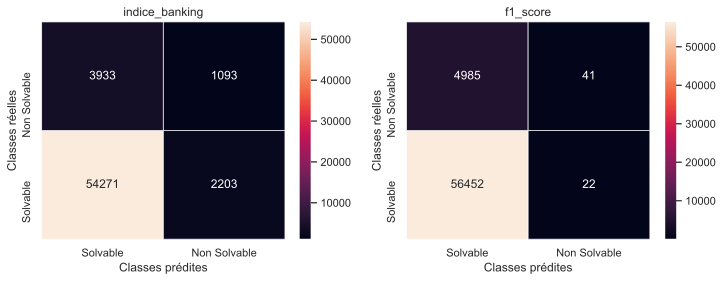

In [110]:
mat_conf = plot_heatmap_confusion(valid_set["TARGET"],
                       **{"indice_banking": y_pred_0, "f1_score": y_pred_1})

La comparaison des deux matrices de confusion pour la métrique spécifique métier et la métrique technique, montre qu'il y a moins de clients 'True negatifs' mais également moins de 'False negatifs'. C'est à dire que plus de clients ne se sont pas vus accordés de prêts alors qu'ils étaient solvables, mais à l'inverse moins de clients ont été prédits solvables alors qu'ils ne l'étaient pas. Ce que l'on a essayé par la construction d'une métrique métier est donc vérifié. Le bilan est in fine supérieur pour la métrique métier, à condition d'avoir posé les bons poids au départ.

In [111]:
# Calcule du gain pour la métrique bancaire
J_0 = Ind_bank(valid_set["TARGET"], y_pred_0)
# Calcul du gain pour la métrique métier
J_1 = Ind_bank(valid_set["TARGET"], y_pred_1)
print("Le gain normalisé pour la métrique banking est de {:.2f} alors qu'il est de {:.2f} pour la métrique technique"
      .format(J_0, J_1))
print("La création de la métrique banking permet un gain de {:.1f}%".format(100*(J_0 - J_1)/J_0))

Le gain normalisé pour la métrique banking est de 0.61 alors qu'il est de 0.53 pour la métrique technique
La création de la métrique banking permet un gain de 12.8%


## Précision, rappel et roc_auc
Fonction de calcul du score pour les différentes métriques

In [112]:
def calculate_multi_metrics(clf, x_valid, y_valid, threshold, *metrics):
   
    # liste des scores
    scores = []
    
    # calcule de la probabilité retourné par le modèle
    valid_proba = clf.predict_proba(x_valid)[:, 1]
    # calcule de la prédiction en fonction du threshold
    valid_predictions = (valid_proba > threshold)
    valid_predictions = np.array(valid_predictions > 0) * 1
    
    # Calcule le score pour chaque métrique
    for metric in metrics :
        scores.append(metric(y_valid, valid_predictions))
        
    return scores # retourne la liste des différents scores

In [113]:
# Calcul les scores Accuracy, Recall et Roc_auc
scores_0 = calculate_multi_metrics(clf_0,
                                   valid_set.drop(columns=["TARGET"]),
                                   valid_set["TARGET"],
                                   best_parameters_0["solvability_threshold"],
                                   *[accuracy_score, recall_score, roc_auc_score])

In [114]:
# Calcul les scores Accuracy, Recall et Roc_auc
scores_1 = calculate_multi_metrics(clf_1,
                                   valid_set.drop(columns=["TARGET"]),
                                   valid_set["TARGET"],
                                   best_parameters_1["solvability_threshold"],
                                   *[accuracy_score, recall_score, roc_auc_score])

Affichage graphique des scores : précision, rappel et roc_auc pour les 2 modèles optimisés

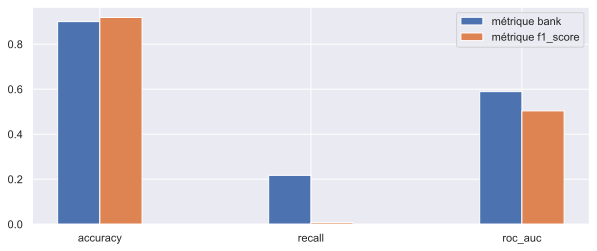

In [115]:
fig, ax = plt.subplots(1, figsize=(10, 4))

x = np.arange(3)  # the label locations
width = 0.2  # the width of the bars

ax.bar(x - width/2, scores_0, width, label='métrique bank')

ax.bar(x + width/2, scores_1, width, label='métrique f1_score')

ax.set_xticks(x)
ax.set_xticklabels(['accuracy', 'recall', 'roc_auc'])
ax.legend()
plt.show()

L'optimisation par métrique bancaire fait perdre un peu de précision au modèle. En revanche le gain en rappel est très important, ce qui était ou à fait prédictible puisque nous avons fortement pénalisé les 'False Negatives'. Le gain est in fine plus important pour l'optimisation via la métrique bancaire comme nous l'avons vu ci-dessus.

## Prédiction sur les données test non étiquettées

L'objectif étant de prédire la solvabilité des clients souhaitant emprunter, nous utilisons le modèle déterminé pour prédire leur solvabilité

In [116]:
y_proba_test = clf_0.predict_proba(test_set.drop(columns=["TARGET"]))[:, 1]
y_pred_test = (y_proba_test > best_parameters_0['solvability_threshold'])
y_pred_test = np.array(y_pred_test > 0) * 1
# On remplace les valeurs 'NaN' par les prédictions du modèle
test_set["TARGET"] = y_pred_test
app_test_no_encoded = app_no_encoded.loc[app_no_encoded["TARGET"].isna()]
app_test_no_encoded.loc[:, 'TARGET'] = test_set["TARGET"]

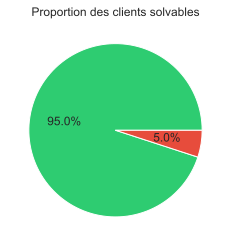

In [117]:
plt.title("Proportion des clients solvables")
plt.pie(test_set["TARGET"].value_counts(),
       colors=["#2ecc71", "#e74c3c"],
       autopct='%1.1f%%',
       radius=1)
plt.show()

## Sauvegarde des prédictions

In [118]:
# Sauvegarde des prédictions
test_set.to_csv("app_test.csv")
app_test_no_encoded.to_csv("app_test_no_encoded_no_featureengineering.csv")

# <font color='green'>4. Les features les plus importants avec *lime* </font> 
## Cas général : Importance globale des features

In [119]:
def plot_feature_importances(df):
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending=False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (8, 4))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

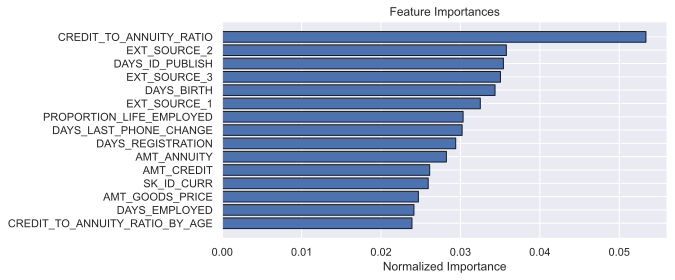

,index,feature,importance,importance_normalized
0,114,CREDIT_TO_ANNUITY_RATIO,862,0.053361
1,33,EXT_SOURCE_2,578,0.035781
2,14,DAYS_ID_PUBLISH,572,0.035409
3,34,EXT_SOURCE_3,566,0.035038
4,11,DAYS_BIRTH,555,0.034357
5,32,EXT_SOURCE_1,525,0.032500
6,110,PROPORTION_LIFE_EMPLOYED,490,0.030333
7,83,DAYS_LAST_PHONE_CHANGE,488,0.030209
8,13,DAYS_REGISTRATION,475,0.029404
9,8,AMT_ANNUITY,456,0.028228


In [120]:
# Affichage de l'importance des features/
plot_feature_importances(feature_importance_0)

## Analyase locale
### Clients similaires
L'algorithme des plus proches voisins permet de déterminer pour chaque client quels sont les clients les plus proches avec la distance euclidienne

In [121]:
from sklearn.neighbors import NearestNeighbors
# Transformation du jeu test
x_test_transformed = pd.DataFrame(clf_0[0].transform(x_test),
                          columns=x_test.columns,
                          index=x_test.index)

nbrs = NearestNeighbors(n_neighbors=10, algorithm='ball_tree').fit(x_test_transformed)

# On récupère l'indice des plus proches voisins du premier client de la table
indices = nbrs.kneighbors(x_test_transformed[0:1])[1].flatten()
app_no_encoded.iloc[indices]

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,...,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Test,PROPORTION_LIFE_EMPLOYED,INCOME_TO_CREDIT_RATIO,INCOME_TO_ANNUITY_RATIO,INCOME_TO_ANNUITY_RATIO_BY_AGE,CREDIT_TO_ANNUITY_RATIO,CREDIT_TO_ANNUITY_RATIO_BY_AGE,INCOME_TO_FAMILYSIZE_RATIO
0,0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,...,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False,0.067329,0.498036,8.198215,-77563.308435,16.461104,-155738.505192,202500.0
11944,11944,113921,0.0,Revolving loans,F,Y,Y,1,225000.0,540000.0,27000.0,540000.0,Unaccompanied,Commercial associate,Higher education,Single / not married,House / apartment,0.072508,-11821,-1274.0,-5807.0,-3603,18.0,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,18,0,0,0,0,0,0,Bank,0.695324,0.664822,0.801601,0.1711,0.0788,0.9781,0.7008,0.0910,...,0.6667,0.0000,0.1342,0.1897,0.0078,0.0053,reg oper account,block of flats,0.1502,Panel,No,4.0,0.0,4.0,0.0,-1497.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,4.0,0.0,2.0,False,0.107774,0.416667,8.333333,-98508.333333,20.000000,-236420.000000,112500.0
24476,24476,128476,0.0,Cash loans,F,N,N,0,126000.0,270000.0,13914.0,270000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010556,-14786,-3867.0,-4996.0,-4252,NaN,1,1,1,1,1,0,Laborers,1.0,3,3,FRIDAY,17,0,0,0,1,1,0,Business Entity Type 2,0.677348,0.454019,0.652897,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-3183.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,False,0.261531,0.466667,9.055627,-133896.507115,19.404916,-286921.086675,126000.0
32482,32482,137648,0.0,Cash loans,F,Y,N,1,450000.0,1024740.0,43546.5,900000.0,Unaccompanied,Commercial associate,Incomplete higher,Married,House / apartment,0.025164,-15290,-2990.0,-7583.0,-4643,4.0,1,1,0,1,0,0,Managers,3.0,2,2,FRIDAY,10,0,0,0,0,0,0,Trade: type 7,NaN,0.724803,0.531686,0.1485,0.1102,0.9861,0.8096,0.0265,...,0.3750,0.0367,0.1231,0.1680,0.0000,0.0000,reg ope

## Cas particulier : Importance des features pour un client spécifique

In [122]:
conda install -c conda-forge lime 

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - lime


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    lime-0.2.0.1               |     pyh9f0ad1d_0         233 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         233 KB

The following NEW packages will be INSTALLED:

  lime               conda-forge/noarch::lime-0.2.0.1-pyh9f0ad1d_0



lime-0.2.0.1         | 233 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [123]:
from lime.lime_tabular import LimeTabularExplainer
lime1 = LimeTabularExplainer(x_test_transformed,
                             feature_names=x_test.columns,
                             class_names=["Solvable", "Non Solvable"],
                             discretize_continuous=False)
                            

exp = lime1.explain_instance(x_test_transformed.iloc[100],
                             clf_0.predict_proba,
                             num_samples=100)

In [124]:
# Id client
x_test_transformed.index[100]

307611

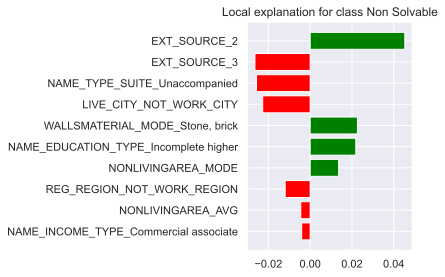

In [125]:
# Affichage des résultats
exp.show_in_notebook(show_table=False)

exp.as_pyplot_figure()
plt.tight_layout()

La non solvabilité du client '100763' est supérieur au seuil de solvabilité de 0.1, donc le client est non solvable. La variable qui joue le plus en sa défaveur est 'EXT_SOURCE_3' qui est un score normalisé provenant d'autres données. La variable qui joue le plus en sa faveur est 'LIVE_REGION_NOT_WORK_REGION', il ne vie pas dans la même région qu'il travaille.

### Explication des variables les plus pertinentes.
- **SK_ID_CURR** : ID du prêt dans notre échantillon,
- **TARGET**: "Variable cible (1 - client ayant des difficultés de paiement : il/elle a eu un retard de paiement de plus de X jours sur au moins un des Y premiers versements du prêt dans notre échantillon, 0 - tous les autres cas.
- **NAME_CONTRACT_TYPE** : Identification si le prêt est cash ou revolving.
- **NAME_TYPE_SUITE**Qui accompagnait le client lors de sa demande de prêt.
- **EXT_SOURCE_1_2_3** :Score normalisé1, 2, 3 de la source de données externe
- **REG_REGION_NOT_WORK_REGION** : "Drapeau indiquant que l'adresse permanente du client ne correspond pas à son adresse professionnelle (1=différent, 0=simple, au niveau de la région)".
- **NAME_TYPE_SUITE** : Qui accompagnait le client lors de sa demande de prêt.
- **LIVE_CITY_NOT_WORK_CITY** : "Drapeau si l'adresse de contact du client ne correspond pas à l'adresse de travail (1=différent, 0=simple, au niveau de la région)".
- **NAME_EDUCATION_TYPE** : Niveau d'éducation le plus élevé atteint par le client.
- **NAME_INCOME_TYPE** : Type de revenu du client (homme d'affaires, travailleur, congé maternité,...)
- **NONLIVINGAREA_AVG** : "Information normalisée sur l'immeuble où vit le client, Quelle est la taille moyenne (suffixe _AVG), modus (suffixe _MODE), médiane (suffixe _MEDI) de l'appartement, la surface commune, la surface habitable, l'âge de l'immeuble, le nombre d'ascenseurs, le nombre d'entrées, l'état de l'immeuble, le nombre d'étages",normalized.
- **WALLSMATERIAL_MODE** : Information normalisée sur l'immeuble où vit le client, Quelle est la taille moyenne (suffixe _AVG), modus (suffixe _MODE), médiane (suffixe _MEDI) de l'appartement, la surface commune, la surface habitable, l'âge de l'immeuble, le nombre d'ascenseurs, le nombre d'entrées, l'état de l'immeuble, le nombre d'étages",normalized.
- **CODE_GENDER** : Sexe du client.

In [133]:
filename = 'ModelClassifier.pkl'
#banking_model_f1.md
# Resauvegarde du modèle
pickle.dump(clf_1, open(filename, 'wb'))

In [130]:
filename = 'banking_model_f1.md'
#banking_model_f1.md
# Resauvegarde du modèle
pickle.dump(clf_1, open(filename, 'wb'))